# Logistic Regression and K-Nearest-Neighbors with `Weekly` Dataset

Complete the following parts of exercise #13 is section 4.8 of *Introduction to Statistical Learning 2e* (pg 193).

(a)

(b) - use both `sklearn` and the `statsmodel` package for this

(c)

(d)

(g)

(j) - experiment with various values of K

(i) - between KNN and logistic-regression and different features in model

In [1]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('/Users/yuanhanlim/Desktop/DS & ML/10_weekly_logistic_regression_knn/weekly.csv')

# Show the first few rows to verify the structure
df.head()


/var/folders/79/6xh3y3cd7kl6qqpcykmzhz8r0000gn/T/ipykernel_20420/4256721925.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [2]:
# Check for missing values
df.isnull().sum()

# Optionally, drop rows with missing values
df_cleaned = df.dropna()

# Verify the cleaned data
df_cleaned.head()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
import pandas as pd

# Summary statistics
numerical_summary = df_cleaned.describe()

df_cleaned['Direction'] = df_cleaned['Direction'].map({'Up': 1, 'Down': 0})

# Correlations between the features
correlation_matrix = df_cleaned.corr()

numerical_summary



,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [4]:
correlation_matrix

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Direction,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


<Figure size 1200x800 with 0 Axes>

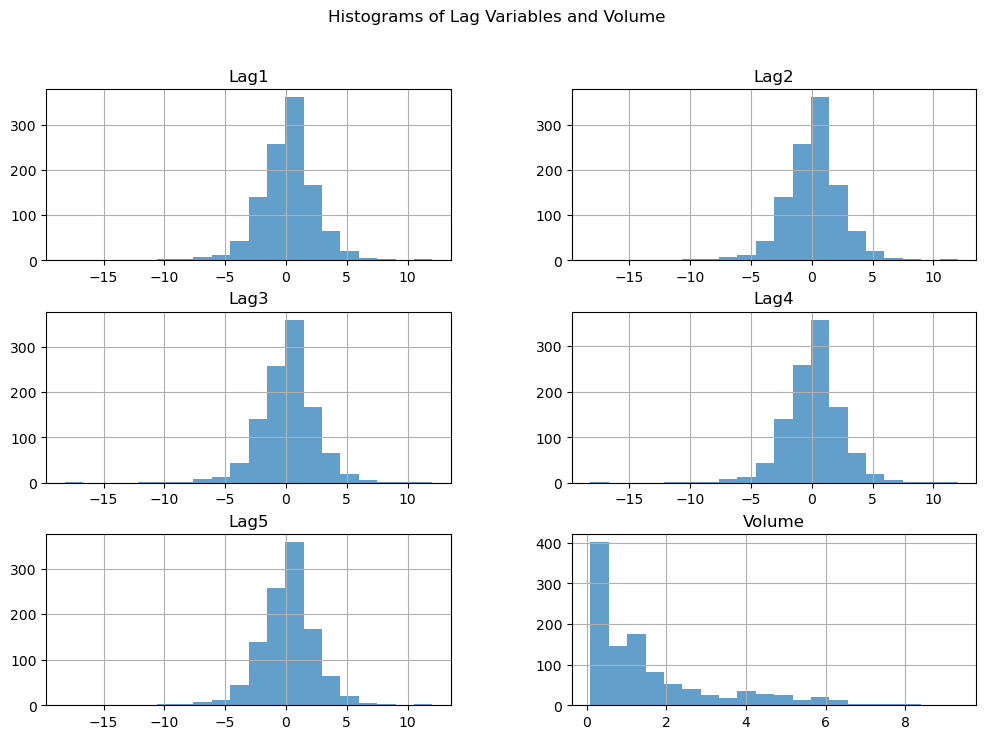

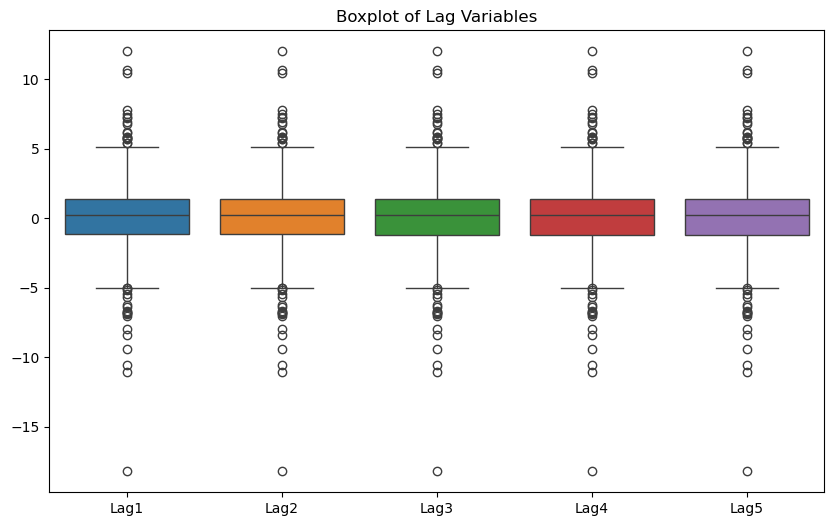

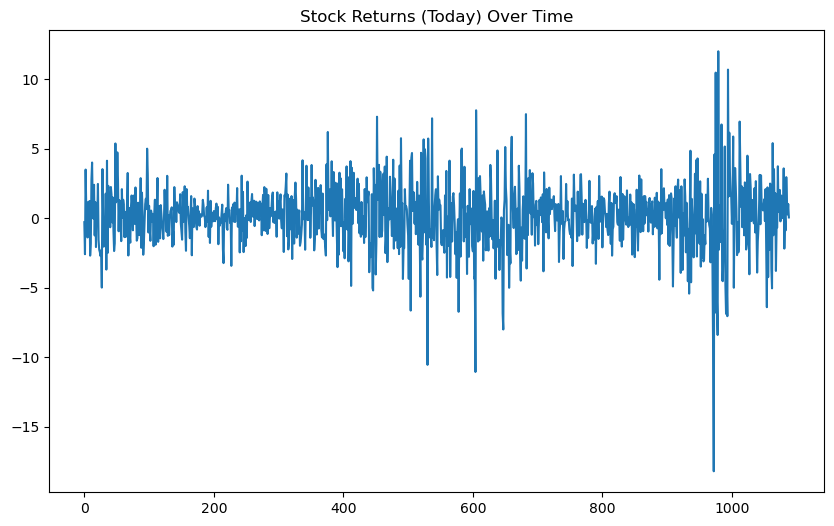

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Lag1, Lag2, and Volume
plt.figure(figsize=(12, 8))
df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']].hist(bins=20, alpha=0.7, figsize=(12, 8))
plt.suptitle('Histograms of Lag Variables and Volume')
plt.show()

# Boxplot for Lag variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']])
plt.title('Boxplot of Lag Variables')
plt.show()

# Time Series Plot for "Today"
plt.figure(figsize=(10, 6))
df['Today'].plot(title='Stock Returns (Today) Over Time')
plt.show()


### No Patterns 

In [6]:
import statsmodels.api as sm

# Prepare the data for logistic regression
X = df_cleaned[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df_cleaned['Direction']

# Add intercept to the model
X_with_intercept = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X_with_intercept)
result = model.fit()

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:                0.006580
Time:                        16:48:59   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

### Lag 2 is statistically significant (with p value = 0.027 < 0.05)

### Using all features as predictors 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
n
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:\n', cm)
print(f'Accuracy: {accuracy:.2f}')


Confusion Matrix:
 [[ 17  67]
 [ 28 106]]
Accuracy: 0.56


- True Positives (TP) = 106: The model correctly predicted 106 positive cases.
- False Positives (FP) = 67: The model incorrectly predicted 67 cases as positive when they were actually negative.
- False Negatives (FN) = 28: The model incorrectly predicted 28 cases as negative when they were actually positive.
- True Negatives (TN) = 17: The model correctly predicted 17 negative cases.

### Logistic Final Result

In [17]:
# Filter data for training (1990-2008) and testing (2009-2010)
train_data = df_cleaned[(df_cleaned['Year'] >= 1990) & (df['Year'] <= 2008)]
test_data = df_cleaned[(df_cleaned['Year'] >= 2009) & (df['Year'] <= 2010)]

X_train = train_data[['Lag2']]  # Using only 'Lag2' as the predictor
y_train = train_data['Direction']

X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# Fit the logistic regression model on training data
logreg.fit(X_train, y_train)

# Predictions on test data
y_pred_test = logreg.predict(X_test)

# Confusion Matrix and Accuracy for Test Data
cm_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Test Confusion Matrix:\n', cm_test)
print(f'Test Accuracy: {accuracy_test:.2f}')


Test Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Test Accuracy: 0.62


## KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# List of combinations of predictors
predictor_combinations = [
    ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'],  # All variables
    ['Lag1', 'Lag2'],                                  # Lag1 and Lag2                 
    ['Lag1', 'Lag5'],                                  # Lag1 and Lag5
    ['Lag1', 'Lag2', 'Volume'],                        # Lag1, Lag2, and Volume
]

# Evaluate for each combination of predictors
for predictors in predictor_combinations:
    X_train = train_data[predictors]
    X_test = test_data[predictors]
    
    # Fit KNN model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    # Predict on test data
    y_pred_knn = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f'Accuracy for predictors {predictors}: {accuracy_knn:.2f}')

Accuracy for predictors ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']: 0.50
Accuracy for predictors ['Lag1', 'Lag2']: 0.49
Accuracy for predictors ['Lag1', 'Lag5']: 0.54
Accuracy for predictors ['Lag1', 'Lag2', 'Volume']: 0.56


### Transformation/ Scaling

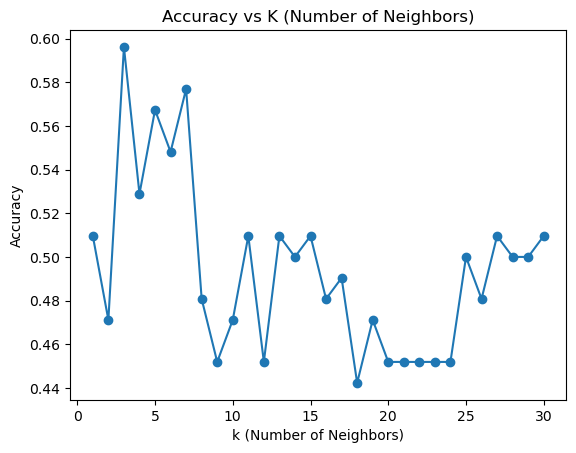

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scaling all predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)  # You can also use other combinations like X_train_poly
    y_pred_knn = knn.predict(X_test_scaled)  # Adjust for each transformation you use
    accuracies.append(accuracy_score(y_test, y_pred_knn))

# Plot accuracy vs k

plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs K (Number of Neighbors)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()



#### After tweaking K multiple times and scaling the features, it seems that k = 3 gives the best accuracy  

### Interation 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate interaction terms (degree=2 will create all pairwise interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train[['Lag1', 'Lag2', 'Volume']])
X_test_poly = poly.transform(X_test[['Lag1', 'Lag2', 'Volume']])

# Fit KNN with interaction terms
knn.fit(X_train_poly, y_train)
y_pred_poly_knn = knn.predict(X_test_poly)
accuracy_poly_knn = accuracy_score(y_test, y_pred_poly_knn)
print(f'Accuracy with interaction terms: {accuracy_poly_knn:.2f}')


#### Interation terms doesn't help


## KNN Final Result 

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)  # Experiment with n_neighbors
knn.fit(X_train_scaled, y_train)

# Predictions on test data
y_pred_knn = knn.predict(X_test_scaled)

# Confusion Matrix and Accuracy for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print('KNN Test Confusion Matrix:\n', cm_knn)
print(f'KNN Test Accuracy: {accuracy_knn:.2f}')


KNN Test Confusion Matrix:
 [[27 16]
 [26 35]]
KNN Test Accuracy: 0.60


# Conclusion 
#### It seems like both methods are close with KNN giving us 0.6 accuracy_score after scaling the feature, choosing only ['Lag1', 'Lag2', 'Volume'] as predictors and K = 3, while Logistic giving us 0.62 after reducing the number of features to only 'Lag2' as our predictor. Thus, we choose Logistic Regression for this dataset as it is more accurate (on test set) and simpler. 